Libraries imported successfully. Pandas version: 2.2.2
Numpy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Enhanced Contextual Factors Data (First 5 days):
        Date  DayOfWeek  SeasonalityFactor DemandLevel        EventType  \
0 2024-07-01     Monday           0.800000      Medium  SmallConference   
1 2024-07-02    Tuesday           0.814117      Medium             None   
2 2024-07-03  Wednesday           0.828216         Low             None   
3 2024-07-04   Thursday           0.842279    Very Low             None   
4 2024-07-05     Friday           0.856291      Medium       SportsGame   

  Weather  CompetitorPricingIndex  BookingPace_7D_Out  
0  Cloudy                1.000000            0.328238  
1   Sunny                0.981173            0.369822  
2  Cloudy                0.952445            0.157546  
3   Sunny                0.948274            0.130356  
4  Cloudy                0.936937            0.327303  


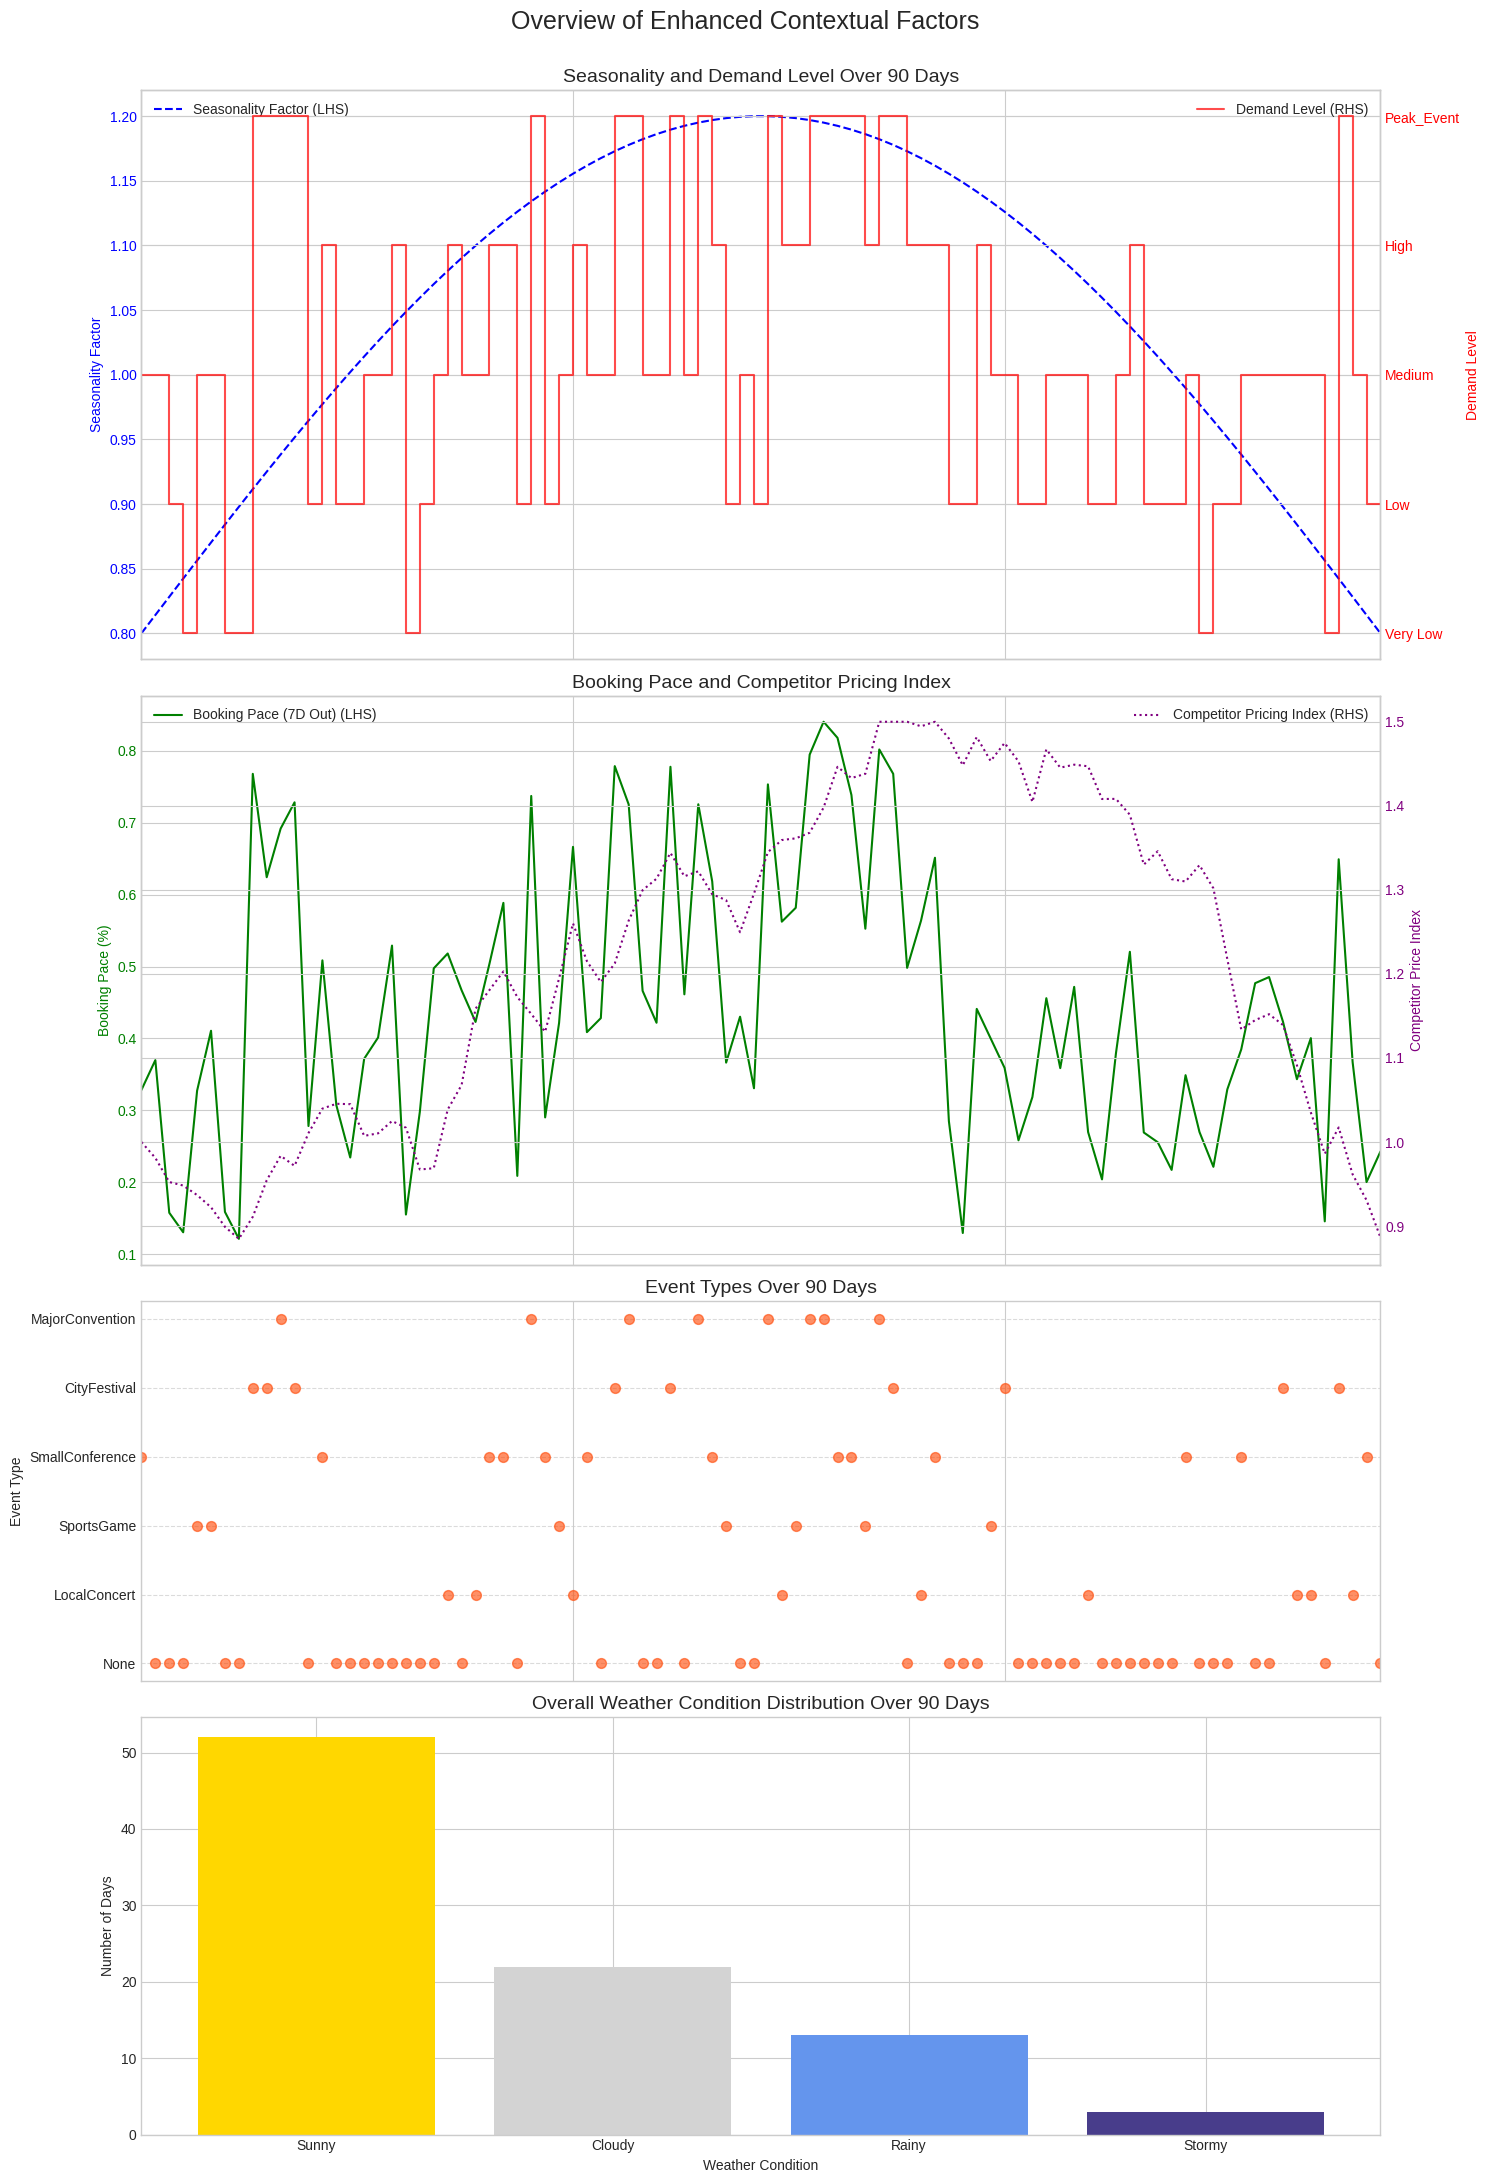


Enhanced Guest Profiles Data (First 5 guests):
        GuestID LoyaltyStatus  IsRepeatGuest  TotalPastSpend  PastSentimentScore  UsedSpaPast  UsedFineDiningPast  AvgPastAncillarySpend  PartySize  LengthOfStay     ReasonForTravel  BookingChannel  LeadTimeDays                 Preferences_Encoded
0  Guest_V2_001          Gold              0        0.000000                 NaN            1                   1              44.015716          4             2  ConferenceAttendee     OTA_Expedia            29                         [city_view]
1  Guest_V2_002          Gold              1      406.200743            4.632476            0                   1             161.566606          1             2         Celebration  OTA_BookingCom            23  [early_checkin_req, extra_pillows]
2  Guest_V2_003          None              1      524.472007            5.000000            0                   0              12.836653          4             2             Leisure       Corporate           

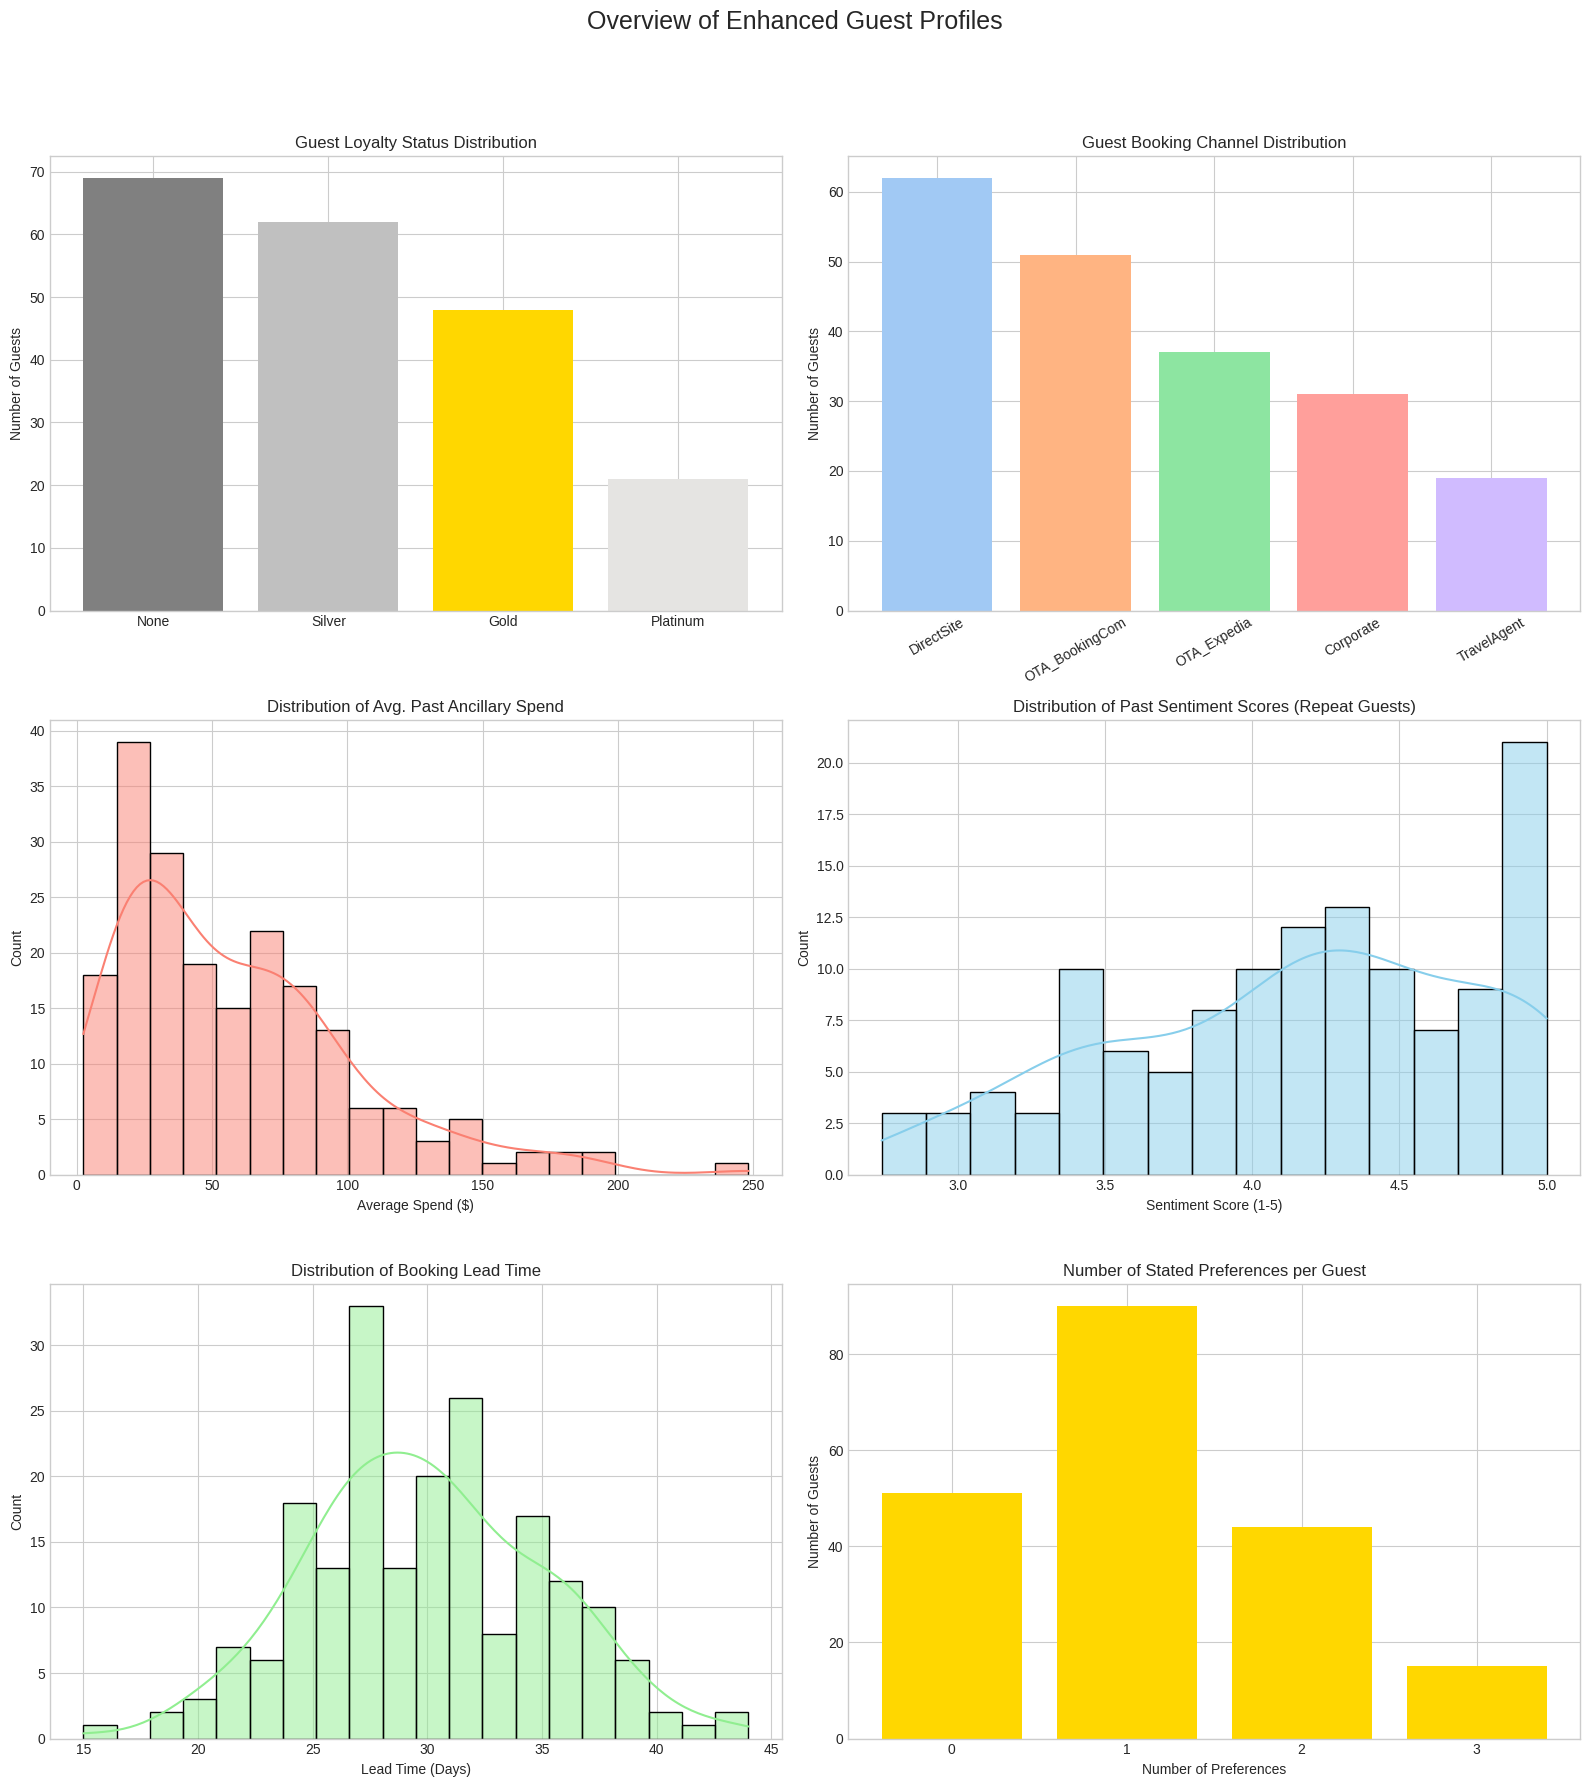


Enhanced Hotel Offerings Catalog (Sample with new fields):
  OfferID                              OfferName     Category  BasePrice  \
0   RU001                 Upgrade to Deluxe Room  RoomUpgrade         60   
1   RU002           Upgrade to Suite (City View)  RoomUpgrade        180   
2   RU003        Upgrade to Family Connect Rooms  RoomUpgrade        100   
3   FB001  Gourmet Breakfast Buffet (per person)          F&B         30   
4   FB002     Chef's Tasting Menu Dinner for Two          F&B        150   

   OfferCost  OfferPopularityScore  \
0         15                  0.70   
1         50                  0.80   
2         30                  0.65   
3         12                  0.85   
4         60                  0.75   

                                           OfferTags  
0                           [comfort, value_upgrade]  
1                  [luxury, view, spacious, premium]  
2               [family, connecting_rooms, spacious]  
3            [food, breakfast, con

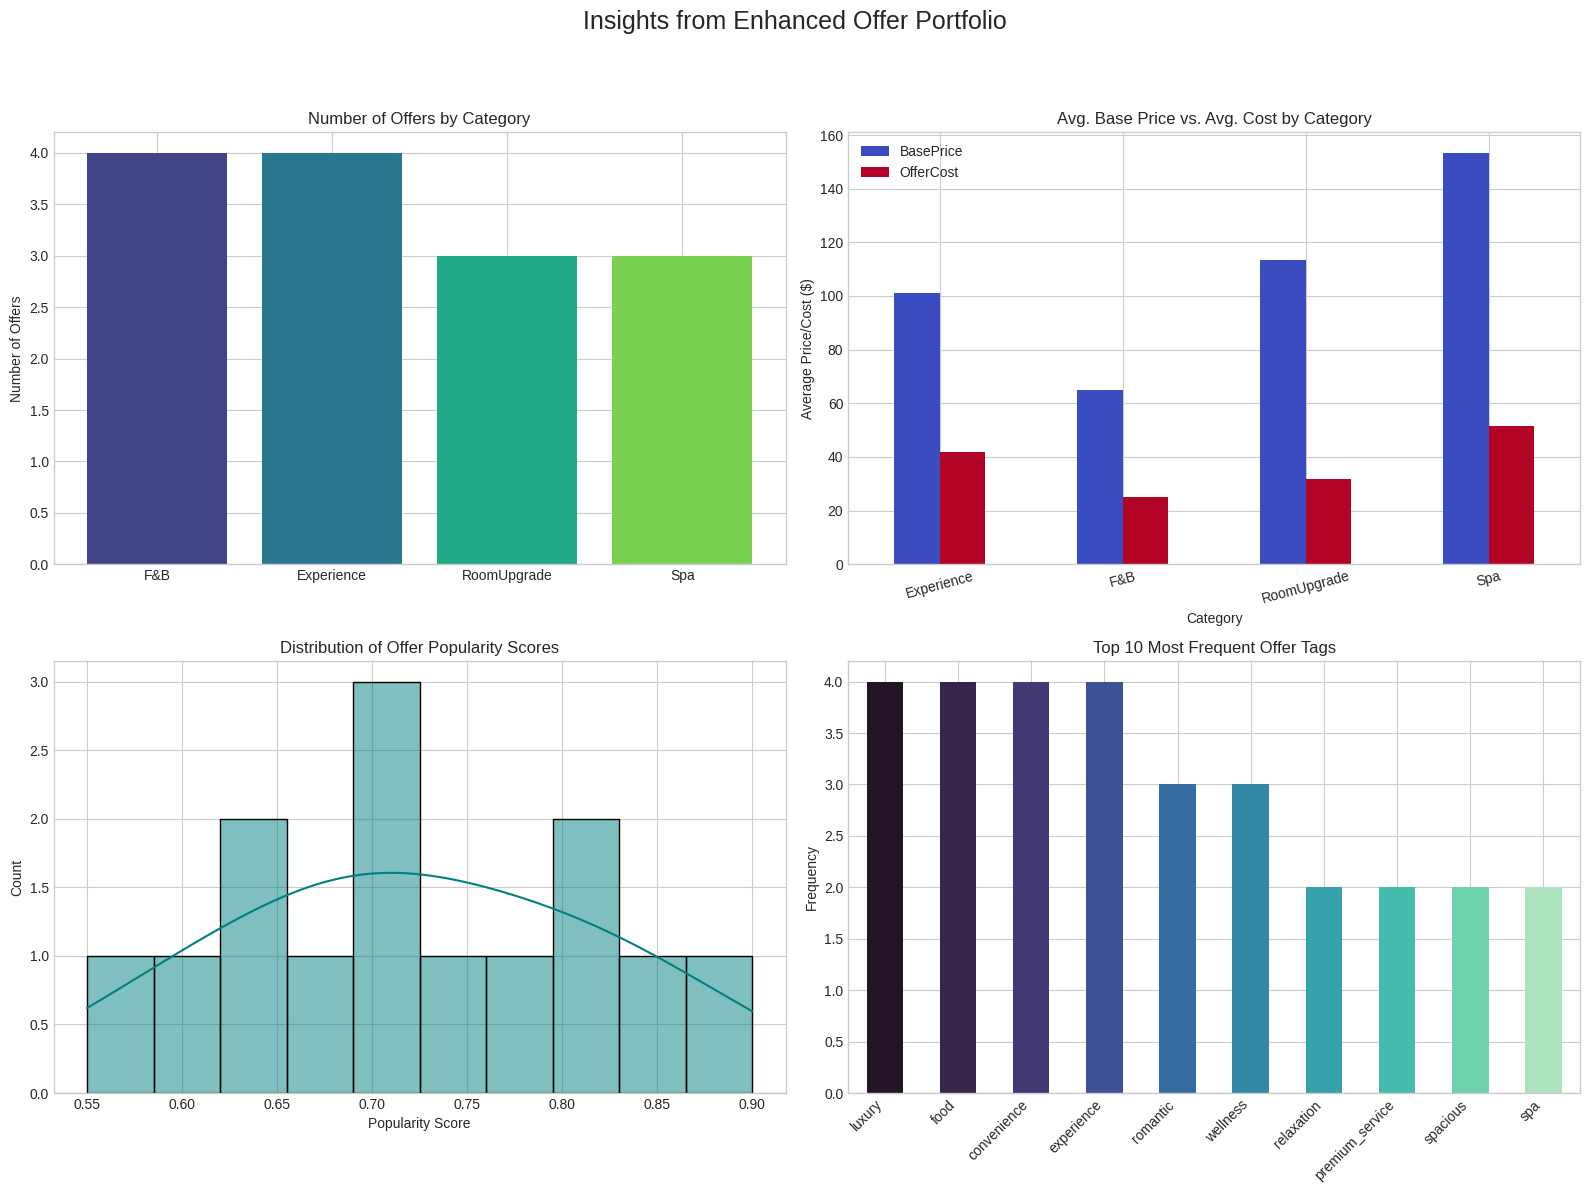

Context for 2024-07-31:
  Date: 2024-07-31 00:00:00
  DayOfWeek: Wednesday
  SeasonalityFactor: 1.1487393810410156
  DemandLevel: Medium
  EventType: SportsGame
  Weather: Sunny
  CompetitorPricingIndex: 1.194718621661634
  BookingPace_7D_Out: 0.4214102873247288
Room Rate Multiplier for this context: 1.19

Enhanced Guest Segments (Sample):
          GuestID     ReasonForTravel LoyaltyStatus  TotalPastSpend  \
24   Guest_V2_025             Leisure        Silver      967.034612   
87   Guest_V2_088            Bleisure        Silver        0.000000   
44   Guest_V2_045             Leisure          None     1048.639737   
170  Guest_V2_171  ConferenceAttendee      Platinum        0.000000   
123  Guest_V2_124             Leisure          None      621.458658   

                    Segment  
24   Couple_StandardLeisure  
87       Bleisure_ShortStay  
44   Couple_StandardLeisure  
170          Conference_VIP  
123            Solo_Leisure  


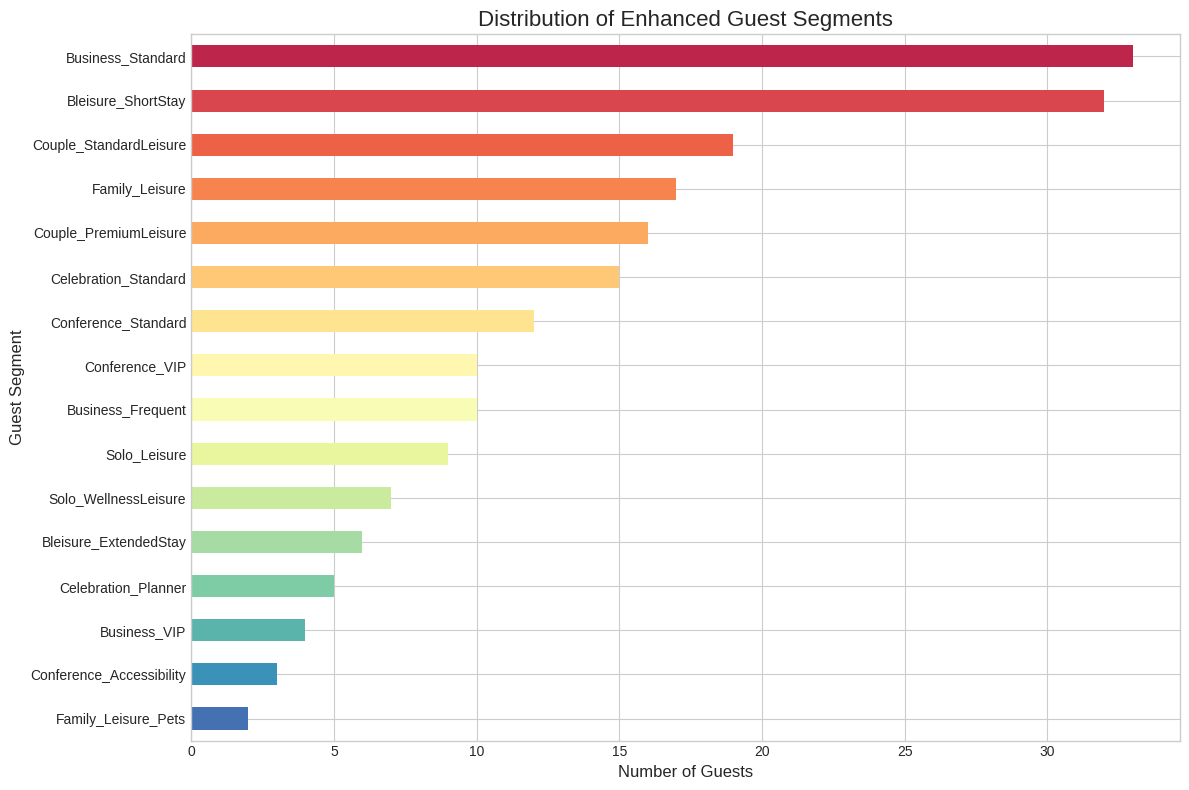


--- Advanced Scenario ---
Date: 2024-07-09, Day: Tuesday
Context: Demand='Peak_Event', Event='CityFestival', Weather='Sunny'
Booking Pace (7D): 0.77, Comp. Index: 0.91, Seasonality: 0.91
Guest ID: Guest_V2_192, Segment: Couple_PremiumLeisure
Loyalty: Gold, Reason: Leisure, LOS: 3
Preferences: []
-------------------------

Top Recommended Offers (Post-Scoring):
  OfferID                               OfferName    Category  BasePrice  \
7   EX003  Private City Highlights Tour (4 hours)  Experience        300   
4   SP002     Ultimate Relaxation Spa Day for Two         Spa        350   
2   FB002      Chef's Tasting Menu Dinner for Two         F&B        150   
6   EX001        Guaranteed Late Check-Out (3 PM)  Experience         50   
1   FB001   Gourmet Breakfast Buffet (per person)         F&B         30   

   DynamicPrice  PropensityScore_Simulated  CompositeScore  CurrentInventory  
7        379.28                   0.434571          0.5638                 2  
4        421.42      

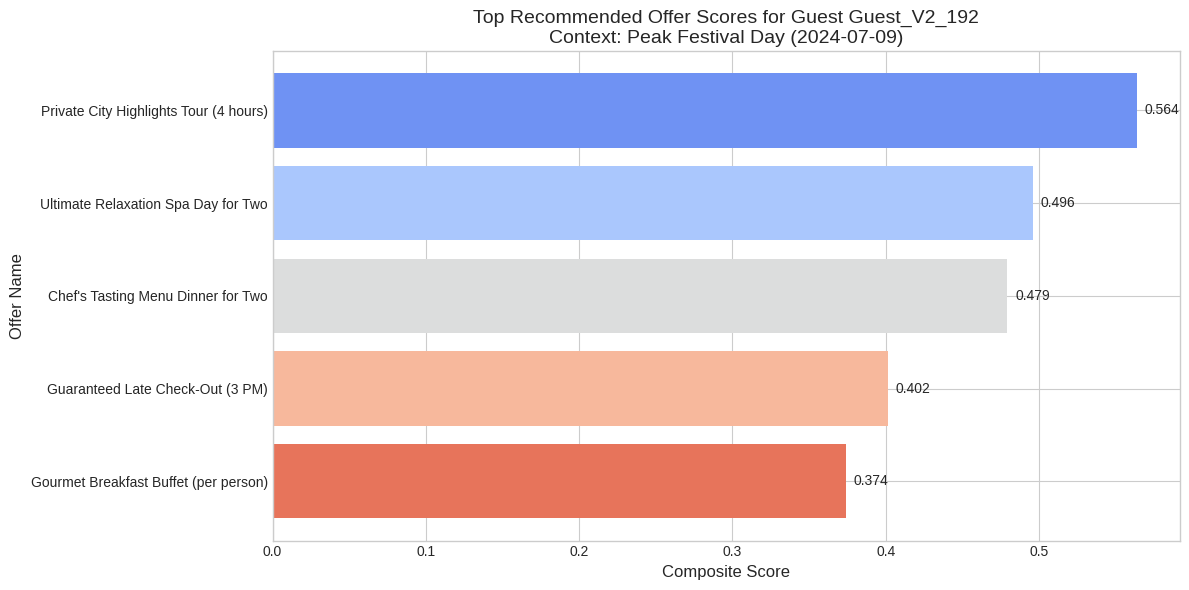

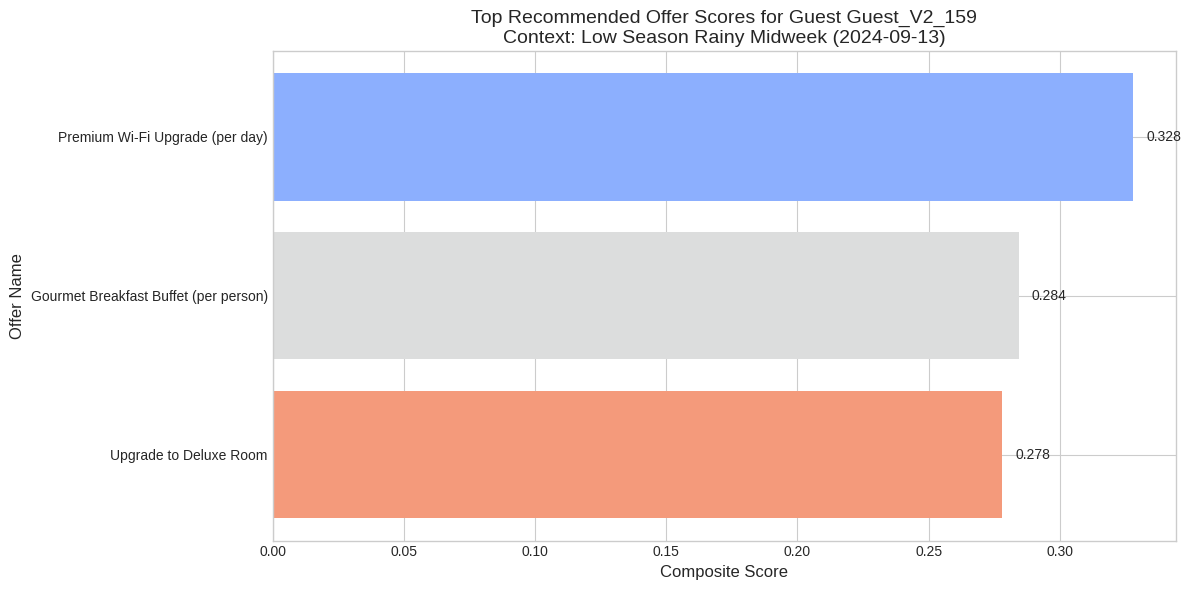

In [5]:
# %% [markdown]
# # Advanced Context-Aware Dynamic Offer Engine (V2)
# ## A Hospitality Showcase: Embracing Complexity
#
# **Andrew Howie - Demonstrating a Blend of Hospitality Expertise & Advanced Data Science**
#
# ## Introduction
#
#
#
# The core objective: to intelligently integrate real-world contextual factors (demand, events, weather, competitor actions, booking pace)
# with rich guest personalization to deliver timely, relevant, and dynamically priced upsell and ancillary offers.
# This aims to maximize Total Revenue Per Available Guest (TRevPAR), enhance guest satisfaction, and optimize operational efficiency.
#
# **Key Enhancements in V2:**
# 1.  **Richer Data Simulation:** More detailed contextual factors (e.g., competitor pricing, booking pace, seasonality), more comprehensive guest profiles (e.g., booking channel, past sentiment, detailed preferences), and more nuanced offer characteristics (e.g., cost, prerequisites).
# 2.  **Sophisticated Engine Logic:**
#     * Advanced Guest Segmentation (conceptually moving towards data-driven methods).
#     * A multi-factor **Offer Scoring System** for ranking recommendations.
#     * Introduction of a simulated **Propensity-to-Buy Model** for offers.
#     * More nuanced dynamic pricing logic for ancillary offers.
# 3.  **Complex Systems Perspective:** Commentary on feedback loops, adaptability, and how the engine attempts to navigate the dynamic nature of hotel operations.
#
#
# %%
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Import GridSpec
import seaborn as sns
from datetime import datetime, timedelta
import random
from collections import Counter

# Matplotlib style
plt.style.use('seaborn-v0_8-whitegrid')
# Ensure plots are displayed correctly in Jupyter
%matplotlib inline

print("Libraries imported successfully. Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

# %% [markdown]
# ## 1. Enhanced Data Simulation: Building a More Realistic Hotel Ecosystem
#
# We expand our data simulation to capture more of the nuances that influence hotel operations and guest behavior.

# %% [markdown]
# ### 1.1. Contextual Factors Simulation (Enhanced)
#
# Simulating data for a 90-day period to better observe trends. Adding `DayOfWeek`, `SeasonalityFactor`, `CompetitorPricingIndex`, and `BookingPace`.

# %%
num_days_v2 = 90 # Extended period
base_date_v2 = datetime(2024, 7, 1)
dates_v2 = [base_date_v2 + timedelta(days=i) for i in range(num_days_v2)]
day_of_week_v2 = [(base_date_v2 + timedelta(days=i)).strftime('%A') for i in range(num_days_v2)]

# Seasonality Factor (e.g., 0.8 for low season, 1.2 for high season)
# Simple sine wave for seasonality over 90 days, peaking in the middle
seasonality_factor_v2 = np.sin(np.linspace(0, np.pi, num_days_v2)) * 0.4 + 0.8 # Ranges roughly 0.8 to 1.2

# Demand Levels & Probabilities (influenced by seasonality and day of week)
demand_levels_v2 = ['Very Low', 'Low', 'Medium', 'High', 'Peak_Event']
simulated_demand_v2 = []
for i in range(num_days_v2):
    base_probs = [0.15, 0.25, 0.30, 0.20, 0.10]
    # Adjust probs by seasonality
    seasonal_adj = seasonality_factor_v2[i]
    if seasonal_adj > 1.1: # High season
        base_probs = [0.05, 0.15, 0.30, 0.30, 0.20]
    elif seasonal_adj < 0.9: # Low season
        base_probs = [0.25, 0.35, 0.25, 0.10, 0.05]

    # Adjust for DayOfWeek (e.g., higher demand Fri/Sat for leisure)
    if day_of_week_v2[i] in ['Friday', 'Saturday']:
        base_probs[3] += 0.1 # More High
        base_probs[4] += 0.05 # More Peak_Event
        base_probs[0] -= 0.05 # Less Very Low
        base_probs[1] -= 0.1  # Less Low
        # Normalize probabilities
        base_probs = [max(0,p) for p in base_probs]
        base_probs = [p / sum(base_probs) for p in base_probs]

    simulated_demand_v2.append(np.random.choice(demand_levels_v2, p=base_probs))


# Event Types (correlated with DemandLevel)
event_types_v2 = ['None', 'LocalConcert', 'SportsGame', 'SmallConference', 'CityFestival', 'MajorConvention']
simulated_events_v2 = []
for i in range(num_days_v2):
    demand = simulated_demand_v2[i]
    if demand == 'Peak_Event':
        simulated_events_v2.append(np.random.choice(event_types_v2[3:], p=[0.2, 0.4, 0.4])) # Must be a significant event
    elif demand == 'High':
        simulated_events_v2.append(np.random.choice(event_types_v2, p=[0.3, 0.2, 0.2, 0.15, 0.1, 0.05]))
    elif demand == 'Medium':
        simulated_events_v2.append(np.random.choice(event_types_v2, p=[0.6, 0.15, 0.1, 0.1, 0.05, 0.0]))
    else: # Low or Very Low
        simulated_events_v2.append(np.random.choice(event_types_v2, p=[0.85, 0.05, 0.05, 0.05, 0.0, 0.0]))


# Weather: Sunny, Cloudy, Rainy, Stormy (less frequent)
weather_conditions_v2 = ['Sunny', 'Cloudy', 'Rainy', 'Stormy']
simulated_weather_v2 = np.random.choice(weather_conditions_v2, num_days_v2, p=[0.55, 0.25, 0.15, 0.05])

# Competitor Pricing Index (0.8 = 20% cheaper, 1.2 = 20% more expensive)
# Random walk, but tends to be higher when our demand is high
competitor_pricing_index_v2 = [1.0]
for i in range(1, num_days_v2):
    prev_index = competitor_pricing_index_v2[-1]
    change = np.random.normal(0, 0.03)
    if simulated_demand_v2[i] in ['High', 'Peak_Event']:
        change += 0.02 # Competitors also likely raise prices
    if simulated_demand_v2[i] in ['Very Low', 'Low']:
        change -= 0.02 # Competitors also likely lower prices
    competitor_pricing_index_v2.append(np.clip(prev_index + change, 0.7, 1.5))


# Booking Pace (Percentage of rooms booked for this date, 7 days out)
# Higher for high demand, higher seasonality. Lower for low demand.
booking_pace_7d_out_v2 = []
for i in range(num_days_v2):
    base_pace = 0.3
    if simulated_demand_v2[i] == 'Peak_Event': base_pace = 0.7
    elif simulated_demand_v2[i] == 'High': base_pace = 0.55
    elif simulated_demand_v2[i] == 'Medium': base_pace = 0.4
    elif simulated_demand_v2[i] == 'Low': base_pace = 0.25
    elif simulated_demand_v2[i] == 'Very Low': base_pace = 0.15

    pace = base_pace * (seasonality_factor_v2[i] * 0.5 + 0.5) # Modulate by seasonality
    pace += np.random.normal(0, 0.05) # Add some noise
    booking_pace_7d_out_v2.append(np.clip(pace, 0.05, 0.95))


contextual_df_v2 = pd.DataFrame({
    'Date': dates_v2,
    'DayOfWeek': day_of_week_v2,
    'SeasonalityFactor': seasonality_factor_v2,
    'DemandLevel': simulated_demand_v2,
    'EventType': simulated_events_v2,
    'Weather': simulated_weather_v2,
    'CompetitorPricingIndex': competitor_pricing_index_v2,
    'BookingPace_7D_Out': booking_pace_7d_out_v2
})

print("Enhanced Contextual Factors Data (First 5 days):")
print(contextual_df_v2.head())

# %% [markdown]
# #### Visualization: Enhanced Contextual Factors

# %%
# Corrected Visualization Cell
fig = plt.figure(figsize=(15, 22)) # Adjusted figure size
gs = gridspec.GridSpec(4, 1, height_ratios=[3, 3, 2, 2.2]) # Give different heights, last one slightly more for xlabel

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1], sharex=ax0) # Share x with ax0
ax2 = fig.add_subplot(gs[2], sharex=ax0) # Share x with ax0
ax3 = fig.add_subplot(gs[3]) # Independent x-axis for the weather bar chart

contextual_df_v2_plot = contextual_df_v2.set_index('Date')

# Plot 0: Demand Level & Seasonality (on ax0)
ax0_twin = ax0.twinx() # Create a twin y-axis that shares the same x-axis
contextual_df_v2_plot['SeasonalityFactor'].plot(ax=ax0, color='blue', linestyle='--', label='Seasonality Factor (LHS)')
ax0.set_ylabel('Seasonality Factor', color='blue')
ax0.tick_params(axis='y', labelcolor='blue')
ax0.legend(loc='upper left')

demand_map = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Peak_Event': 5}
contextual_df_v2_plot['DemandNumeric'] = contextual_df_v2_plot['DemandLevel'].map(demand_map)
contextual_df_v2_plot['DemandNumeric'].plot(ax=ax0_twin, color='red', label='Demand Level (RHS)', alpha=0.7, drawstyle="steps-post")
ax0_twin.set_yticks(list(demand_map.values()))
ax0_twin.set_yticklabels(list(demand_map.keys()))
ax0_twin.set_ylabel('Demand Level', color='red')
ax0_twin.tick_params(axis='y', labelcolor='red')
ax0_twin.legend(loc='upper right')
ax0.set_title('Seasonality and Demand Level Over 90 Days', fontsize=14)

# Plot 1: Booking Pace and Competitor Pricing Index (on ax1)
ax1.plot(contextual_df_v2_plot.index, contextual_df_v2_plot['BookingPace_7D_Out'], label='Booking Pace (7D Out) (LHS)', color='green')
ax1.set_ylabel('Booking Pace (%)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

ax1_twin = ax1.twinx()
ax1_twin.plot(contextual_df_v2_plot.index, contextual_df_v2_plot['CompetitorPricingIndex'], label='Competitor Pricing Index (RHS)', color='purple', linestyle=':')
ax1_twin.set_ylabel('Competitor Price Index', color='purple')
ax1_twin.tick_params(axis='y', labelcolor='purple')
ax1_twin.legend(loc='upper right')
ax1.set_title('Booking Pace and Competitor Pricing Index', fontsize=14)

# Plot 2: Event Types (on ax2)
event_numeric_map = {event: i for i, event in enumerate(event_types_v2)}
# For plotting, ensure we handle cases where an event type might not be in the map if map is fixed
# However, event_types_v2 is the source, so all simulated_events_v2 will be in event_numeric_map
ax2.scatter(contextual_df_v2_plot.index, contextual_df_v2_plot['EventType'].map(event_numeric_map),
               alpha=0.6, label='Event Occurrences', s=50, color='orangered')
ax2.set_yticks(list(event_numeric_map.values()))
ax2.set_yticklabels(list(event_numeric_map.keys()))
ax2.set_ylabel('Event Type')
ax2.set_title('Event Types Over 90 Days', fontsize=14)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7) # Grid only on y for scatter clarity
ax2.set_xlabel('Date') # Add x-label to the last shared axis plot

# Remove x-tick labels for shared axes to avoid overlap, except for the last shared one (ax2)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

# Plot 3: Weather Distribution (on ax3 - independent x-axis)
weather_counts_v2 = contextual_df_v2['Weather'].value_counts().reindex(weather_conditions_v2).fillna(0) # Ensure all conditions are present
ax3.bar(weather_counts_v2.index, weather_counts_v2.values, color=['#FFD700', '#D3D3D3', '#6495ED', '#483D8B']) # Sunny, Cloudy, Rainy, Stormy
ax3.set_title('Overall Weather Condition Distribution Over 90 Days', fontsize=14)
ax3.set_ylabel('Number of Days')
ax3.set_xlabel('Weather Condition') # Corrected xlabel

# fig.autofmt_xdate() # Apply only if needed, can sometimes affect categorical axes if not careful
# For the shared date axes (ax0, ax1, ax2), rotation might be good if dates are dense
for label in ax2.get_xticklabels(): # Rotate labels only on the bottom shared axis
    label.set_rotation(30)
    label.set_ha('right')

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to ensure suptitle fits
fig.suptitle('Overview of Enhanced Contextual Factors', fontsize=18, y=0.99)
plt.show()


# %% [markdown]
# ### 1.2. Guest Profile Simulation (Enhanced)
#
# Creating 200 sample guests with more detailed attributes.

# %%
num_guests_v2 = 200
guest_ids_v2 = [f"Guest_V2_{i+1:003}" for i in range(num_guests_v2)]

# Loyalty Status (as before)
loyalty_levels_v2 = ['None', 'Silver', 'Gold', 'Platinum']
simulated_loyalty_v2 = np.random.choice(loyalty_levels_v2, num_guests_v2, p=[0.35, 0.30, 0.25, 0.10])

# Past Behavior
used_spa_past_v2 = np.random.choice([0, 1], num_guests_v2, p=[0.65, 0.35])
used_fine_dining_past_v2 = np.random.choice([0, 1], num_guests_v2, p=[0.55, 0.45])
avg_past_ancillary_spend_v2 = np.random.gamma(shape=2, scale=30, size=num_guests_v2).clip(min=0, max=300) # Skewed distribution
is_repeat_guest_v2 = np.random.choice([0, 1], num_guests_v2, p=[0.4, 0.6])
total_past_spend_v2 = (is_repeat_guest_v2 * np.random.gamma(shape=3, scale=200, size=num_guests_v2)).clip(min=0, max=5000)
past_sentiment_score_v2 = (is_repeat_guest_v2 * np.random.normal(loc=4.2, scale=0.8, size=num_guests_v2)).clip(min=1, max=5) # 1-5 scale
past_sentiment_score_v2[is_repeat_guest_v2 == 0] = np.nan # No sentiment for new guests

# Current Booking Details
party_sizes_v2 = np.random.choice([1, 2, 3, 4, 5], num_guests_v2, p=[0.25, 0.50, 0.12, 0.10, 0.03]) # Max 5
length_of_stays_v2 = np.random.choice([1, 2, 3, 4, 5, 6, 7], num_guests_v2, p=[0.15, 0.25, 0.30, 0.15, 0.08, 0.04, 0.03])
reasons_for_travel_v2 = ['Business', 'Leisure', 'Celebration', 'Bleisure', 'ConferenceAttendee']
simulated_reasons_v2 = np.random.choice(reasons_for_travel_v2, num_guests_v2, p=[0.25, 0.35, 0.10, 0.15, 0.15])
booking_channels_v2 = ['DirectSite', 'OTA_Expedia', 'OTA_BookingCom', 'Corporate', 'TravelAgent']
simulated_channels_v2 = np.random.choice(booking_channels_v2, num_guests_v2, p=[0.30, 0.20, 0.25, 0.15, 0.10])
lead_time_days_v2 = np.random.poisson(lam=30, size=num_guests_v2).clip(min=0, max=180) # Avg lead time 30 days

# Encoded Preferences (list of tags)
all_possible_preferences = [
    "quiet_room", "high_floor", "low_floor", "near_elevator", "away_from_elevator",
    "early_checkin_req", "late_checkout_req", "extra_pillows", "hypoallergenic",
    "accessibility_needs", "balcony_preferred", "city_view", "garden_view",
    "vegan_options_interest", "gluten_free_interest", "pet_friendly_stay"
]
guest_preferences_v2 = []
for _ in range(num_guests_v2):
    num_prefs = np.random.choice([0, 1, 2, 3], p=[0.3, 0.4, 0.2, 0.1])
    guest_preferences_v2.append(list(np.random.choice(all_possible_preferences, num_prefs, replace=False)))


guest_profiles_df_v2 = pd.DataFrame({
    'GuestID': guest_ids_v2,
    'LoyaltyStatus': simulated_loyalty_v2,
    'IsRepeatGuest': is_repeat_guest_v2,
    'TotalPastSpend': total_past_spend_v2,
    'PastSentimentScore': past_sentiment_score_v2,
    'UsedSpaPast': used_spa_past_v2,
    'UsedFineDiningPast': used_fine_dining_past_v2,
    'AvgPastAncillarySpend': avg_past_ancillary_spend_v2,
    'PartySize': party_sizes_v2,
    'LengthOfStay': length_of_stays_v2,
    'ReasonForTravel': simulated_reasons_v2,
    'BookingChannel': simulated_channels_v2,
    'LeadTimeDays': lead_time_days_v2,
    'Preferences_Encoded': guest_preferences_v2
})

print("\nEnhanced Guest Profiles Data (First 5 guests):")
print(guest_profiles_df_v2.head().to_string()) # .to_string() for better display of list column

# %% [markdown]
# #### Visualization: Enhanced Guest Profile Overview

# %%
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

# Loyalty Status
loyalty_counts_v2 = guest_profiles_df_v2['LoyaltyStatus'].value_counts().reindex(loyalty_levels_v2)
axs[0, 0].bar(loyalty_counts_v2.index, loyalty_counts_v2.values, color=['gray', 'silver', 'gold', '#E5E4E2'])
axs[0, 0].set_title('Guest Loyalty Status Distribution', fontsize=12)
axs[0, 0].set_ylabel('Number of Guests')

# Booking Channel
channel_counts = guest_profiles_df_v2['BookingChannel'].value_counts()
axs[0, 1].bar(channel_counts.index, channel_counts.values, color=sns.color_palette("pastel", len(channel_counts)))
axs[0, 1].set_title('Guest Booking Channel Distribution', fontsize=12)
axs[0, 1].set_ylabel('Number of Guests')
axs[0, 1].tick_params(axis='x', rotation=30)


# Avg Past Ancillary Spend
sns.histplot(guest_profiles_df_v2['AvgPastAncillarySpend'], kde=True, ax=axs[1, 0], color='salmon', bins=20)
axs[1, 0].set_title('Distribution of Avg. Past Ancillary Spend', fontsize=12)
axs[1, 0].set_xlabel('Average Spend ($)')

# Past Sentiment Score (for repeat guests)
sns.histplot(guest_profiles_df_v2['PastSentimentScore'].dropna(), kde=True, ax=axs[1, 1], color='skyblue', bins=15)
axs[1, 1].set_title('Distribution of Past Sentiment Scores (Repeat Guests)', fontsize=12)
axs[1, 1].set_xlabel('Sentiment Score (1-5)')


# Lead Time
sns.histplot(guest_profiles_df_v2['LeadTimeDays'], kde=True, ax=axs[2, 0], color='lightgreen', bins=20)
axs[2, 0].set_title('Distribution of Booking Lead Time', fontsize=12)
axs[2, 0].set_xlabel('Lead Time (Days)')

# Number of Preferences Stated
guest_profiles_df_v2['NumPreferences'] = guest_profiles_df_v2['Preferences_Encoded'].apply(len)
pref_counts = guest_profiles_df_v2['NumPreferences'].value_counts().sort_index()
axs[2, 1].bar(pref_counts.index.astype(str), pref_counts.values, color='gold')
axs[2, 1].set_title('Number of Stated Preferences per Guest', fontsize=12)
axs[2, 1].set_xlabel('Number of Preferences')
axs[2, 1].set_ylabel('Number of Guests')


fig.suptitle('Overview of Enhanced Guest Profiles', fontsize=18, y=0.99)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# %% [markdown]
# ### 1.3. Hotel Offerings & Inventory Simulation (Enhanced)
#
# Adding `OfferCost`, `OfferPopularityScore`, `OfferPrerequisites`, `OfferRestrictions`, and `OfferTags`.

# %%
offers_data_v2 = [
    # Room Upgrades
    {'OfferID': 'RU001', 'OfferName': 'Upgrade to Deluxe Room', 'Category': 'RoomUpgrade', 'BasePrice': 60, 'OfferCost': 15, 'BaseInventory': 10, 'ContextSuitability': ['Any'], 'GuestSegmentSuitability': ['Any'], 'MinLOS': 1, 'OfferPopularityScore': 0.7, 'OfferPrerequisites': [], 'OfferRestrictions': [], 'OfferTags': ['comfort', 'value_upgrade']},
    {'OfferID': 'RU002', 'OfferName': 'Upgrade to Suite (City View)', 'Category': 'RoomUpgrade', 'BasePrice': 180, 'OfferCost': 50, 'BaseInventory': 5, 'ContextSuitability': ['High', 'Peak_Event', 'Sunny', 'CityFestival'], 'GuestSegmentSuitability': ['Luxury', 'Celebration', 'Bleisure_VIP'], 'MinLOS': 2, 'OfferPopularityScore': 0.8, 'OfferPrerequisites': [], 'OfferRestrictions': ['subject_to_availability_on_day'], 'OfferTags': ['luxury', 'view', 'spacious', 'premium']},
    {'OfferID': 'RU003', 'OfferName': 'Upgrade to Family Connect Rooms', 'Category': 'RoomUpgrade', 'BasePrice': 100, 'OfferCost': 30, 'BaseInventory': 3, 'ContextSuitability': ['Any'], 'GuestSegmentSuitability': ['Family_Leisure', 'Group_Celebration'], 'MinLOS': 2, 'OfferPopularityScore': 0.65, 'OfferPrerequisites': ['party_size_gt_2'], 'OfferRestrictions': [], 'OfferTags': ['family', 'connecting_rooms', 'spacious']},

    # F&B
    {'OfferID': 'FB001', 'OfferName': 'Gourmet Breakfast Buffet (per person)', 'Category': 'F&B', 'BasePrice': 30, 'OfferCost': 12, 'BaseInventory': 100, 'ContextSuitability': ['Any'], 'GuestSegmentSuitability': ['Any'], 'MinLOS': 1, 'OfferPopularityScore': 0.85, 'OfferPrerequisites': [], 'OfferRestrictions': [], 'OfferTags': ['food', 'breakfast', 'convenience', 'variety']},
    {'OfferID': 'FB002', 'OfferName': 'Chef\'s Tasting Menu Dinner for Two', 'Category': 'F&B', 'BasePrice': 150, 'OfferCost': 60, 'BaseInventory': 8, 'ContextSuitability': ['Any'], 'GuestSegmentSuitability': ['Couple_PremiumLeisure', 'Couple_Celebration', 'Luxury', 'Foodie'], 'MinLOS': 1, 'OfferPopularityScore': 0.75, 'OfferPrerequisites': ['reservation_required'], 'OfferRestrictions': ['not_valid_saturday_peak'], 'OfferTags': ['food', 'fine_dining', 'romantic', 'experience', 'luxury']},
    {'OfferID': 'FB003', 'OfferName': 'Local Craft Brewery Tasting Flight', 'Category': 'F&B', 'BasePrice': 25, 'OfferCost': 8, 'BaseInventory': 20, 'ContextSuitability': ['SportsGame', 'LocalConcert', 'Rainy', 'Cloudy'], 'GuestSegmentSuitability': ['Leisure', 'Bleisure_Standard', 'Solo_Leisure'], 'MinLOS': 1, 'OfferPopularityScore': 0.6, 'OfferPrerequisites': [], 'OfferRestrictions': ['age_21_plus'], 'OfferTags': ['food', 'drinks', 'local_experience', 'casual']},
    {'OfferID': 'FB004', 'OfferName': 'Artisan Welcome Chocolates & Prosecco', 'Category': 'F&B', 'BasePrice': 55, 'OfferCost': 20, 'BaseInventory': 15, 'ContextSuitability': ['Any'], 'GuestSegmentSuitability': ['Couple_Celebration', 'Luxury', 'Anniversary'], 'MinLOS': 1, 'OfferPopularityScore': 0.7, 'OfferPrerequisites': [], 'OfferRestrictions': [], 'OfferTags': ['food', 'drinks', 'celebration', 'romantic', 'welcome_amenity']},

    # Spa & Wellness
    {'OfferID': 'SP001', 'OfferName': 'Jet Lag Recovery Massage (45-min)', 'Category': 'Spa', 'BasePrice': 90, 'OfferCost': 30, 'BaseInventory': 6, 'ContextSuitability': ['Rainy', 'Cloudy', 'Low', 'Very Low'], 'GuestSegmentSuitability': ['Business_VIP', 'Solo_Leisure', 'Bleisure_Traveler', 'LongHaulArrival'], 'MinLOS': 1, 'OfferPopularityScore': 0.68, 'OfferPrerequisites': ['spa_appointment_required'], 'OfferRestrictions': [], 'OfferTags': ['wellness', 'spa', 'relaxation', 'business_perk']},
    {'OfferID': 'SP002', 'OfferName': 'Ultimate Relaxation Spa Day for Two', 'Category': 'Spa', 'BasePrice': 350, 'OfferCost': 120, 'BaseInventory': 3, 'ContextSuitability': ['Any'], 'GuestSegmentSuitability': ['Couple_PremiumLeisure', 'Couple_Celebration', 'Luxury', 'Anniversary'], 'MinLOS': 1, 'OfferPopularityScore': 0.72, 'OfferPrerequisites': ['spa_appointment_required'], 'OfferRestrictions': ['advance_booking_recommended'], 'OfferTags': ['wellness', 'spa', 'luxury', 'romantic', 'experience', 'relaxation']},
    {'OfferID': 'SP003', 'OfferName': 'Morning Yoga & Wellness Shot', 'Category': 'Spa', 'BasePrice': 20, 'OfferCost': 5, 'BaseInventory': 15, 'ContextSuitability': ['Sunny', 'Medium'], 'GuestSegmentSuitability': ['WellnessFocused', 'Leisure', 'Solo_Leisure'], 'MinLOS': 1, 'OfferPopularityScore': 0.55, 'OfferPrerequisites': [], 'OfferRestrictions': [], 'OfferTags': ['wellness', 'fitness', 'healthy_start', 'experience']},

    # Experiences & Packages
    {'OfferID': 'EX001', 'OfferName': 'Guaranteed Late Check-Out (3 PM)', 'Category': 'Experience', 'BasePrice': 50, 'OfferCost': 5, 'BaseInventory': 8, 'ContextSuitability': ['Any'], 'GuestSegmentSuitability': ['Business_VIP', 'Leisure', 'Celebration', 'Bleisure_Traveler'], 'MinLOS': 1, 'OfferPopularityScore': 0.9, 'OfferPrerequisites': [], 'OfferRestrictions': [], 'OfferTags': ['convenience', 'flexibility', 'premium_service']},
    {'OfferID': 'EX002', 'OfferName': 'Valet Parking (per day)', 'Category': 'Experience', 'BasePrice': 40, 'OfferCost': 10, 'BaseInventory': 30, 'ContextSuitability': ['Peak_Event', 'High', 'CityFestival', 'MajorConvention'], 'GuestSegmentSuitability': ['Luxury', 'Business_VIP', 'DrivingGuest'], 'MinLOS': 1, 'OfferPopularityScore': 0.78, 'OfferPrerequisites': [], 'OfferRestrictions': [], 'OfferTags': ['convenience', 'parking', 'premium_service']},
    {'OfferID': 'EX003', 'OfferName': 'Private City Highlights Tour (4 hours)', 'Category': 'Experience', 'BasePrice': 300, 'OfferCost': 150, 'BaseInventory': 2, 'ContextSuitability': ['Sunny', 'CityFestival'], 'GuestSegmentSuitability': ['Luxury', 'Family_Leisure_Premium', 'Couple_PremiumLeisure', 'FirstTimeVisitor'], 'MinLOS': 2, 'OfferPopularityScore': 0.62, 'OfferPrerequisites': ['advance_booking_24hr'], 'OfferRestrictions': [], 'OfferTags': ['experience', 'tour', 'local_culture', 'luxury', 'private']},
    {'OfferID': 'EX004', 'OfferName': 'Premium Wi-Fi Upgrade (per day)', 'Category': 'Experience', 'BasePrice': 15, 'OfferCost': 2, 'BaseInventory': 200, 'ContextSuitability': ['Any'], 'GuestSegmentSuitability': ['Business_Standard', 'Business_VIP', 'Bleisure_Traveler', 'TechSavvy'], 'MinLOS': 1, 'OfferPopularityScore': 0.82, 'OfferPrerequisites': [], 'OfferRestrictions': [], 'OfferTags': ['convenience', 'tech', 'business_tool', 'connectivity']},
]

offers_df_v2 = pd.DataFrame(offers_data_v2)
offers_df_v2['ProfitMargin_Base'] = offers_df_v2['BasePrice'] - offers_df_v2['OfferCost']
offers_df_v2['CurrentInventory'] = offers_df_v2['BaseInventory'] # Initialize for simulation

print("\nEnhanced Hotel Offerings Catalog (Sample with new fields):")
print(offers_df_v2[['OfferID', 'OfferName', 'Category', 'BasePrice', 'OfferCost', 'OfferPopularityScore', 'OfferTags']].head())

# %% [markdown]
# #### Visualization: Enhanced Offer Portfolio Insights

# %%
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Offer Count by Category
category_counts_v2 = offers_df_v2['Category'].value_counts()
axs[0, 0].bar(category_counts_v2.index, category_counts_v2.values, color=sns.color_palette("viridis", len(category_counts_v2)))
axs[0, 0].set_title('Number of Offers by Category', fontsize=12)
axs[0, 0].set_ylabel('Number of Offers')

# Average Base Price vs. Average Offer Cost by Category
avg_price_cost_category = offers_df_v2.groupby('Category')[['BasePrice', 'OfferCost']].mean()
avg_price_cost_category.plot(kind='bar', ax=axs[0, 1], colormap='coolwarm')
axs[0, 1].set_title('Avg. Base Price vs. Avg. Cost by Category', fontsize=12)
axs[0, 1].set_ylabel('Average Price/Cost ($)')
axs[0, 1].tick_params(axis='x', rotation=15)


# Distribution of Offer Popularity Scores
sns.histplot(offers_df_v2['OfferPopularityScore'], kde=True, ax=axs[1, 0], color='teal', bins=10)
axs[1, 0].set_title('Distribution of Offer Popularity Scores', fontsize=12)
axs[1, 0].set_xlabel('Popularity Score')

# Offer Tags Frequency (Top 10)
all_tags = [tag for sublist in offers_df_v2['OfferTags'] for tag in sublist]
tag_counts = Counter(all_tags)
top_tags = pd.Series(tag_counts).sort_values(ascending=False).head(10)
top_tags.plot(kind='bar', ax=axs[1, 1], color=sns.color_palette("mako", len(top_tags)))
axs[1, 1].set_title('Top 10 Most Frequent Offer Tags', fontsize=12)
axs[1, 1].set_ylabel('Frequency')
# Corrected tick_params for axs[1, 1]
for label in axs[1, 1].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')


fig.suptitle('Insights from Enhanced Offer Portfolio', fontsize=18, y=0.99)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# %% [markdown]
# ## 2. Core Engine Components (Enhanced & More Sophisticated)
#
# We refine the engine's logic to incorporate the richer data and introduce more advanced concepts.

# %% [markdown]
# ### 2.1. Contextual Analyzer & Dynamic Base Room Pricing Influence (Conceptual)
#
# This component now considers more factors. While we focus on ancillary offers, these factors also heavily influence room pricing, which is a key input to the overall guest value perception.

# %%
def get_context_summary_v2(date_to_check, contextual_data_df):
    """Retrieves the enhanced context for a given date."""
    context = contextual_data_df[contextual_data_df['Date'] == pd.to_datetime(date_to_check)]
    if context.empty: return None
    return context.iloc[0].to_dict()

def get_room_rate_multiplier_v2(context_summary):
    """More nuanced room rate multiplier based on enhanced context."""
    if not context_summary: return 1.0

    multiplier = 1.0

    # Demand Level
    demand = context_summary['DemandLevel']
    if demand == 'Peak_Event': multiplier *= 1.8
    elif demand == 'High': multiplier *= 1.4
    elif demand == 'Medium': multiplier *= 1.1
    elif demand == 'Very Low': multiplier *= 0.85
    else: multiplier *= 0.95 # Low

    # Seasonality
    multiplier *= (context_summary['SeasonalityFactor'] * 0.3 + 0.7) # Dampen seasonality effect slightly for multiplier

    # Booking Pace (Higher pace -> higher multiplier)
    pace = context_summary['BookingPace_7D_Out']
    if pace > 0.7: multiplier *= 1.15
    elif pace > 0.5: multiplier *= 1.05
    elif pace < 0.2: multiplier *= 0.95

    # Competitor Pricing (If competitors are high, we can be slightly higher)
    comp_index = context_summary['CompetitorPricingIndex']
    multiplier *= (comp_index * 0.2 + 0.8) # e.g., if comp_index is 1.2, this is 1.04. If 0.8, this is 0.96

    return round(max(0.7, multiplier), 2) # Ensure multiplier doesn't go too low

# Example:
sample_date_v2 = contextual_df_v2['Date'].iloc[30] # Pick a day
current_context_v2 = get_context_summary_v2(sample_date_v2, contextual_df_v2)
print(f"Context for {sample_date_v2.strftime('%Y-%m-%d')}:")
for k,v in current_context_v2.items(): print(f"  {k}: {v}")
print(f"Room Rate Multiplier for this context: {get_room_rate_multiplier_v2(current_context_v2)}")

# %% [markdown]
# ### 2.2. Advanced Guest Segmentation (Enhanced Rule-Based, Conceptual ML)
#
# We refine the rule-based segmentation and discuss how ML could enhance this.
#
# **Complex Dynamic Systems Note:** Guest segments are not static. A guest's segment might evolve based on their changing travel patterns, life stage, or even how the hotel interacts with them over time. An adaptive segmentation model would be ideal.

# %%
def segment_guest_v2(guest_profile, current_context=None): # Context can now influence dynamic segmentation
    """
    More advanced rule-based guest segmentation.
    Conceptually, this could be replaced/augmented by a clustering model (e.g., K-Means or hierarchical)
    trained on features like: TotalPastSpend, AvgPastAncillarySpend, PastSentimentScore,
    frequency of stay, typical LeadTimeDays, preferred BookingChannel, common Preferences_Encoded.
    """
    reason = guest_profile['ReasonForTravel']
    loyalty = guest_profile['LoyaltyStatus']
    total_spend = guest_profile['TotalPastSpend']
    party_size = guest_profile['PartySize']
    is_repeat = guest_profile['IsRepeatGuest']
    preferences = guest_profile['Preferences_Encoded']
    lead_time = guest_profile['LeadTimeDays']

    # Base segment on reason
    if reason == 'Business':
        if loyalty in ['Platinum'] or (is_repeat and total_spend > 2000): return 'Business_VIP'
        if loyalty in ['Gold'] or (is_repeat and total_spend > 1000): return 'Business_Frequent'
        return 'Business_Standard'
    elif reason == 'Leisure':
        if party_size >= 3 and ('pet_friendly_stay' in preferences or any('family' in tag for tag in preferences)):
             return 'Family_Leisure_Pets'
        if party_size >= 3 : return 'Family_Leisure'
        if party_size == 2:
            if loyalty in ['Gold', 'Platinum'] or (is_repeat and total_spend > 1500 and 'balcony_preferred' in preferences):
                return 'Couple_PremiumLeisure'
            return 'Couple_StandardLeisure'
        if party_size == 1:
            if 'spa' in "".join(preferences) or guest_profile['UsedSpaPast']: return 'Solo_WellnessLeisure'
            return 'Solo_Leisure'
    elif reason == 'Celebration': # e.g., Anniversary, Birthday
        if loyalty in ['Gold', 'Platinum'] or lead_time > 60: return 'Celebration_Planner' # Planned well in advance
        return 'Celebration_Standard'
    elif reason == 'Bleisure':
        if guest_profile['LengthOfStay'] > 4 : return 'Bleisure_ExtendedStay'
        return 'Bleisure_ShortStay'
    elif reason == 'ConferenceAttendee':
        if 'near_elevator' in preferences or 'accessibility_needs' in preferences : return 'Conference_Accessibility'
        if loyalty in ['Gold', 'Platinum']: return 'Conference_VIP'
        return 'Conference_Standard'

    # Fallback based on general characteristics
    if is_repeat and total_spend > 1000 : return 'Repeat_HighValue'
    if is_repeat : return 'Repeat_Standard'
    return 'New_Guest_General'


guest_profiles_df_v2['Segment'] = guest_profiles_df_v2.apply(segment_guest_v2, axis=1)

print("\nEnhanced Guest Segments (Sample):")
print(guest_profiles_df_v2[['GuestID', 'ReasonForTravel', 'LoyaltyStatus', 'TotalPastSpend', 'Segment']].sample(5))

# %% [markdown]
# #### Visualization: Enhanced Guest Segment Distribution

# %%
segment_counts_v2 = guest_profiles_df_v2['Segment'].value_counts()
plt.figure(figsize=(12, 8))
segment_counts_v2.plot(kind='barh', color=sns.color_palette('Spectral', len(segment_counts_v2)))
plt.title('Distribution of Enhanced Guest Segments', fontsize=16)
plt.xlabel('Number of Guests', fontsize=12)
plt.ylabel('Guest Segment', fontsize=12)
plt.gca().invert_yaxis() # Display most frequent at top
plt.tight_layout()
plt.show()

# %% [markdown]
# ### 2.3. Simulated Propensity-to-Buy Model (Conceptual ML)
#
# We won't train a model here, but we'll simulate its output. A real model (e.g., Logistic Regression, Gradient Boosting) would be trained on historical data of which guests accepted which offers under what circumstances.
#
# **Features for a real Propensity Model could include:**
# * Guest Features: Segment, LoyaltyStatus, PastAncillarySpend, PastSentimentScore, IsRepeatGuest, specific Preferences_Encoded (e.g., one-hot encoded).
# * Offer Features: Category, Price (Dynamic), PopularityScore, OfferTags.
# * Context Features: DemandLevel, EventType, Weather, DayOfWeek, SeasonalityFactor.
# * Interaction Features: GuestSegment_OfferCategory, Loyalty_OfferPriceTier.

# %%
def simulate_propensity_score(guest_profile, offer, current_context):
    """
    Simulates a propensity score (0 to 1) for a guest to accept an offer in a given context.
    This function uses rules and randomness to mimic a trained ML model's output.
    """
    score = 0.3 # Base propensity

    # Guest factors
    if guest_profile['LoyaltyStatus'] == 'Platinum': score += 0.15
    elif guest_profile['LoyaltyStatus'] == 'Gold': score += 0.1
    if guest_profile['IsRepeatGuest'] and guest_profile['PastSentimentScore'] > 4.0 : score += 0.05
    if guest_profile['AvgPastAncillarySpend'] > 100: score += 0.1
    elif guest_profile['AvgPastAncillarySpend'] > 50: score += 0.05

    # Offer factors
    score += (offer['OfferPopularityScore'] - 0.5) * 0.2 # Popular offers are more likely
    if offer['Category'] == 'RoomUpgrade' and guest_profile['ReasonForTravel'] in ['Celebration', 'Bleisure']: score += 0.1
    if offer['Category'] == 'F&B' and 'foodie' in guest_profile['Preferences_Encoded']: score += 0.1
    if offer['Category'] == 'Spa' and guest_profile['UsedSpaPast']: score += 0.15

    # Context factors
    if current_context:
        if current_context['DemandLevel'] in ['Peak_Event', 'High'] and 'convenience' in offer['OfferTags']: score += 0.05
        # Ensure DynamicPrice exists in offer dictionary before comparing
        dynamic_price = offer.get('DynamicPrice', offer['BasePrice'])
        if current_context['DemandLevel'] in ['Very Low', 'Low'] and dynamic_price < offer['BasePrice']: score += 0.05 # Discount effect

        # Check for specific weather related tags if they exist
        weather_related_tags = offer.get('OfferTags', []) # Default to empty list if no tags
        if current_context['Weather'] == 'Rainy' and any(tag in weather_related_tags for tag in ['indoor', 'indoor_comfort', 'spa']): score += 0.05
        if current_context['Weather'] == 'Sunny' and any(tag in weather_related_tags for tag in ['outdoor', 'outdoor_activity', 'tour']): score += 0.05


    # Price sensitivity (simplified)
    current_price = offer.get('DynamicPrice', offer['BasePrice'])
    if current_price > 100: score -= 0.05
    if current_price > 200: score -= 0.05 # Further reduction for very expensive items

    # Interaction: If guest segment aligns well with offer's target segment (from offer definition)
    # Ensure GuestSegmentSuitability is a list/iterable
    guest_segment_suitability = offer.get('GuestSegmentSuitability', [])
    if isinstance(guest_segment_suitability, str): # Handle if it's accidentally a string
        guest_segment_suitability = [guest_segment_suitability]

    if guest_profile['Segment'] in guest_segment_suitability: score += 0.1

    return np.clip(score + np.random.normal(0, 0.05), 0.01, 0.99) # Add noise and clip

# %% [markdown]
# ### 2.4. Offer Filtering, Scoring & Prioritization (Enhanced)
#
# This is the core of the recommendation logic. We first filter feasible offers, then score them based on multiple factors.

# %%
def check_offer_prerequisites(guest_profile, offer, current_context):
    """Checks if guest meets offer prerequisites."""
    offer_prerequisites = offer.get('OfferPrerequisites', []) # Default to empty list
    if not offer_prerequisites: return True # No prerequisites

    for prereq in offer_prerequisites:
        if prereq == 'party_size_gt_2' and guest_profile['PartySize'] <= 2: return False
        if prereq == 'reservation_required': pass # Assume for now, real system would check availability
        if prereq == 'age_21_plus': pass # Assume for now
        if prereq == 'spa_appointment_required': pass
        if prereq == 'advance_booking_24hr' and guest_profile['LeadTimeDays'] < 1 : return False # Example
    return True

def filter_suitable_offers_v2(guest_profile, context_summary, offers_catalog_df):
    """Filters offers based on hard constraints: inventory, LOS, prerequisites, base suitability."""
    if not context_summary: return pd.DataFrame()

    guest_segment = guest_profile['Segment']
    guest_los = guest_profile['LengthOfStay']
    # guest_prefs_tags = set(guest_profile['Preferences_Encoded']) # Not used in this filter, but good for scoring

    suitable_offers_list = []
    for _, offer_row in offers_catalog_df.iterrows():
        offer = offer_row.to_dict() # Work with dict copy
        if offer.get('CurrentInventory', 0) <= 0: continue # Use .get for safety
        if guest_los < offer.get('MinLOS', 0): continue

        if not check_offer_prerequisites(guest_profile, offer, context_summary): continue

        # Base Segment Suitability (broad check, scoring will refine)
        offer_guest_segments = offer.get('GuestSegmentSuitability', [])
        if isinstance(offer_guest_segments, str): offer_guest_segments = [offer_guest_segments] # Ensure it's a list

        segment_match = ('Any' in offer_guest_segments or
                         any(seg_part in guest_segment for seg_part in offer_guest_segments if isinstance(seg_part, str)) or # Partial match
                         guest_segment in offer_guest_segments)
        if not segment_match: continue

        suitable_offers_list.append(offer) # Append the dictionary
    return pd.DataFrame(suitable_offers_list)


def score_offer(guest_profile, offer_dict, current_context, propensity_score): # Expects offer as a dictionary
    """Calculates a composite score for an offer for a specific guest & context."""
    score = 0.0
    weights = {
        'propensity': 0.40,
        'profit_margin': 0.20,
        'context_alignment': 0.15,
        'preference_alignment': 0.15,
        'loyalty_boost': 0.10
    }

    # 1. Propensity Score
    score += weights['propensity'] * propensity_score

    # 2. Potential Profit Margin (Normalized)
    current_price = offer_dict.get('DynamicPrice', offer_dict['BasePrice'])
    profit = current_price - offer_dict['OfferCost']
    normalized_profit = np.clip(profit / 200, 0, 1) # Assume max profit $200 for normalization
    score += weights['profit_margin'] * normalized_profit

    # 3. Context Alignment Score
    context_alignment = 0.0
    offer_context_suitability = offer_dict.get('ContextSuitability', [])
    if isinstance(offer_context_suitability, str): offer_context_suitability = [offer_context_suitability]

    offer_context_tags = set()
    if 'Any' not in offer_context_suitability:
        offer_context_tags.update(offer_context_suitability)

    current_context_values = set([current_context['DemandLevel'], current_context['EventType'], current_context['Weather']])
    common_context_tags = len(offer_context_tags.intersection(current_context_values))

    if 'Any' in offer_context_suitability or not offer_context_tags:
        context_alignment = 0.5
    elif offer_context_tags:
         context_alignment = common_context_tags / len(offer_context_tags)

    generic_offer_tags = set(offer_dict.get('OfferTags', []))
    if current_context['Weather'] == 'Sunny' and any(t in generic_offer_tags for t in ['outdoor_activity', 'tour', 'sunny_perk']): context_alignment += 0.2
    if current_context['Weather'] == 'Rainy' and any(t in generic_offer_tags for t in ['indoor_comfort', 'spa', 'rainy_day_deal']): context_alignment += 0.2
    if current_context['DemandLevel'] == 'Peak_Event' and 'convenience' in generic_offer_tags: context_alignment += 0.1
    score += weights['context_alignment'] * np.clip(context_alignment, 0, 1)

    # 4. Guest Preference Alignment Score
    preference_alignment = 0.0
    guest_prefs_tags = set(guest_profile.get('Preferences_Encoded', []))
    offer_related_tags = set(offer_dict.get('OfferTags', []))

    common_pref_tags = len(guest_prefs_tags.intersection(offer_related_tags))
    if guest_prefs_tags and offer_related_tags:
        preference_alignment = common_pref_tags / len(offer_related_tags)
    elif not guest_prefs_tags and not offer_related_tags: preference_alignment = 0.3
    elif not guest_prefs_tags: preference_alignment = 0.2

    if offer_dict['Category'] == 'Spa' and guest_profile.get('UsedSpaPast', 0): preference_alignment += 0.3
    if offer_dict['Category'] == 'F&B' and guest_profile.get('UsedFineDiningPast', 0) and 'fine_dining' in offer_related_tags: preference_alignment += 0.3
    score += weights['preference_alignment'] * np.clip(preference_alignment, 0, 1)

    # 5. Loyalty Boost
    loyalty_boost_val = 0.0
    if guest_profile['LoyaltyStatus'] == 'Platinum': loyalty_boost_val = 0.2
    elif guest_profile['LoyaltyStatus'] == 'Gold': loyalty_boost_val = 0.1

    if any(t in generic_offer_tags for t in ['luxury', 'premium', 'vip_offer']):
        score += weights['loyalty_boost'] * loyalty_boost_val
    else:
        score += weights['loyalty_boost'] * (loyalty_boost_val * 0.5)

    return round(score, 4)

# %% [markdown]
# ### 2.5. Dynamic Offer Pricing Logic (Enhanced)
#
# Incorporates more contextual factors into pricing ancillary offers.

# %%
def get_dynamic_offer_price_v2(base_price, offer_category, offer_tags_list, context_summary): # offer_tags is a list
    """More nuanced dynamic pricing for ancillary offers."""
    if not context_summary: return base_price

    offer_tags = set(offer_tags_list if isinstance(offer_tags_list, list) else [])


    price_multiplier = 1.0
    demand = context_summary['DemandLevel']
    seasonality = context_summary['SeasonalityFactor']
    booking_pace = context_summary['BookingPace_7D_Out']
    competitor_idx = context_summary['CompetitorPricingIndex']

    # Demand-based adjustment
    if demand == 'Peak_Event': price_multiplier *= 1.20
    elif demand == 'High': price_multiplier *= 1.10
    elif demand == 'Low': price_multiplier *= 0.90
    elif demand == 'Very Low': price_multiplier *= 0.85

    # Seasonality (more subtle effect on ancillaries than rooms)
    price_multiplier *= (1 + (seasonality - 1) * 0.3)

    # Booking Pace
    if booking_pace > 0.75 and 'convenience' in offer_tags : price_multiplier *= 1.05
    if booking_pace < 0.20 : price_multiplier *= 0.95

    # Competitor influence
    price_multiplier *= (1 + (competitor_idx - 1) * 0.1)

    # Category/Tag specific adjustments
    if context_summary['Weather'] == 'Sunny' and any(t in offer_tags for t in ['outdoor_activity', 'tour', 'sunny_perk']):
        price_multiplier *= 1.05
    if context_summary['Weather'] == 'Rainy' and (any(t in offer_tags for t in ['spa', 'indoor_comfort', 'rainy_day_deal']) or 'F&B' in offer_category):
        price_multiplier *= 1.03
    if context_summary['EventType'] not in ['None', 'SmallConference'] and (any(t in offer_tags for t in ['experience', 'convenience']) or 'F&B' in offer_category): # F&B often benefits from events
        price_multiplier *= 1.04

    final_price = round(base_price * price_multiplier, 2)
    # Ensure price doesn't go below a certain floor (e.g., 70% of base or not below cost if cost is available)
    # For this demo, using 70% of base as a simple floor.
    return max(final_price, round(base_price * 0.7, 2))


# %% [markdown]
# ## 3. Advanced Scenario Demonstrations with Scoring
#
# We run scenarios and now show the scoring for top recommended offers.

# %%
def run_advanced_scenario(guest_id, scenario_date_str, contextual_data_df, guest_profiles_df, offers_catalog_df, top_n_offers=3):
    """Runs an advanced scenario with filtering, scoring, and dynamic pricing."""
    scenario_date = pd.to_datetime(scenario_date_str)

    current_context = get_context_summary_v2(scenario_date, contextual_data_df)
    if not current_context:
        print(f"Error: No context found for date {scenario_date_str}")
        return None, None # Return two Nones

    # Ensure guest_profile is a Series, not a DataFrame
    guest_profile_series = guest_profiles_df[guest_profiles_df['GuestID'] == guest_id]
    if guest_profile_series.empty:
        print(f"Error: Guest ID {guest_id} not found.")
        return None, current_context # Return None for df, but context might be valid
    guest_profile = guest_profile_series.iloc[0].copy()


    print(f"\n--- Advanced Scenario ---")
    print(f"Date: {scenario_date.strftime('%Y-%m-%d')}, Day: {current_context['DayOfWeek']}")
    print(f"Context: Demand='{current_context['DemandLevel']}', Event='{current_context['EventType']}', Weather='{current_context['Weather']}'")
    print(f"Booking Pace (7D): {current_context['BookingPace_7D_Out']:.2f}, Comp. Index: {current_context['CompetitorPricingIndex']:.2f}, Seasonality: {current_context['SeasonalityFactor']:.2f}")
    print(f"Guest ID: {guest_profile['GuestID']}, Segment: {guest_profile['Segment']}")
    print(f"Loyalty: {guest_profile['LoyaltyStatus']}, Reason: {guest_profile['ReasonForTravel']}, LOS: {guest_profile['LengthOfStay']}")
    print(f"Preferences: {guest_profile.get('Preferences_Encoded', [])}") # Use .get for safety
    print("-------------------------")

    # Reset inventory for this run
    offers_catalog_df['CurrentInventory'] = offers_catalog_df['BaseInventory']

    filtered_offers_df = filter_suitable_offers_v2(guest_profile, current_context, offers_catalog_df)
    if filtered_offers_df.empty:
        print("No suitable offers found after initial filtering.")
        return pd.DataFrame(), current_context

    processed_offers_list = []
    for _, offer_row in filtered_offers_df.iterrows():
        offer_dict = offer_row.to_dict() # Convert row to dict
        offer_dict['DynamicPrice'] = get_dynamic_offer_price_v2(
            offer_dict['BasePrice'],
            offer_dict['Category'],
            offer_dict.get('OfferTags', []), # Pass tags as list
            current_context
        )
        offer_dict['PropensityScore_Simulated'] = simulate_propensity_score(
            guest_profile, # Pass guest profile Series
            offer_dict,    # Pass offer as dict
            current_context
        )
        processed_offers_list.append(offer_dict)

    if not processed_offers_list:
        print("No offers remained after dynamic pricing and propensity simulation.")
        return pd.DataFrame(), current_context

    processed_offers_df = pd.DataFrame(processed_offers_list)

    processed_offers_df['CompositeScore'] = processed_offers_df.apply(
        lambda row: score_offer(
            guest_profile, # Pass guest profile Series
            row.to_dict(), # Pass offer as dict
            current_context,
            row['PropensityScore_Simulated']
        ),
        axis=1
    )

    recommended_df = processed_offers_df.sort_values(by='CompositeScore', ascending=False).head(top_n_offers)

    if recommended_df.empty:
        print("No offers recommended after scoring.")
    else:
        print("\nTop Recommended Offers (Post-Scoring):")
        # Ensure all columns exist before printing
        cols_to_print = ['OfferID', 'OfferName', 'Category', 'BasePrice', 'DynamicPrice',
                         'PropensityScore_Simulated', 'CompositeScore', 'CurrentInventory']
        existing_cols = [col for col in cols_to_print if col in recommended_df.columns]
        print(recommended_df[existing_cols])

    return recommended_df, current_context

# %% [markdown]
# ### Scenario V2.1: Peak Season City Festival, Platinum Bleisure Traveler
# * **Guest:** A 'Bleisure_ExtendedStay' or 'Business_VIP' with Platinum status, interested in experiences.
# * **Date:** A day with 'Peak_Event' or 'High' demand, a 'CityFestival', 'Sunny' weather, high booking pace.

# %%
# Find a suitable guest for Scenario V2.1
guest_s_v2_1_df = guest_profiles_df_v2[
    (guest_profiles_df_v2['Segment'].str.contains('Bleisure|Business_VIP')) &
    (guest_profiles_df_v2['LoyaltyStatus'] == 'Platinum') &
    (guest_profiles_df_v2['Preferences_Encoded'].apply(lambda x: 'city_view' in x or 'tour' in str(x).lower() if isinstance(x, list) else False))
]
guest_s_v2_1 = guest_s_v2_1_df.sample(1).iloc[0] if not guest_s_v2_1_df.empty else guest_profiles_df_v2.sample(1).iloc[0]


# Find a suitable date for Scenario V2.1
date_s_v2_1_df = contextual_df_v2[
    (contextual_df_v2['DemandLevel'].isin(['Peak_Event', 'High'])) &
    (contextual_df_v2['EventType'] == 'CityFestival') &
    (contextual_df_v2['Weather'] == 'Sunny') &
    (contextual_df_v2['BookingPace_7D_Out'] > 0.6)
]
if date_s_v2_1_df.empty:
    date_s_v2_1_df = contextual_df_v2[contextual_df_v2['DemandLevel'].isin(['Peak_Event', 'High']) & (contextual_df_v2['EventType'] == 'CityFestival')].sample(1, replace=True)
    if date_s_v2_1_df.empty: # Broader fallback
         date_s_v2_1_df = contextual_df_v2[contextual_df_v2['DemandLevel'].isin(['Peak_Event', 'High'])].sample(1, replace=True)

date_s_v2_1 = date_s_v2_1_df['Date'].iloc[0].strftime('%Y-%m-%d')

recommended_s_v2_1_df, context_s_v2_1 = run_advanced_scenario(
    guest_s_v2_1['GuestID'], date_s_v2_1, contextual_df_v2, guest_profiles_df_v2, offers_df_v2, top_n_offers=5
)

# %% [markdown]
# ### Scenario V2.2: Low Season Rainy Midweek, New Solo Business Traveler
# * **Guest:** A 'Business_Standard', new guest, short stay, maybe interested in convenience or comfort.
# * **Date:** A day with 'Very Low' or 'Low' demand, 'Rainy' weather, low booking pace, midweek.

# %%
guest_s_v2_2_df = guest_profiles_df_v2[
    (guest_profiles_df_v2['Segment'] == 'Business_Standard') &
    (guest_profiles_df_v2['IsRepeatGuest'] == 0) &
    (guest_profiles_df_v2['LengthOfStay'] <= 2)
]
guest_s_v2_2 = guest_s_v2_2_df.sample(1).iloc[0] if not guest_s_v2_2_df.empty else guest_profiles_df_v2[guest_profiles_df_v2['Segment'] == 'Business_Standard'].sample(1).iloc[0]


date_s_v2_2_df = contextual_df_v2[
    (contextual_df_v2['DemandLevel'].isin(['Very Low', 'Low'])) &
    (contextual_df_v2['Weather'] == 'Rainy') &
    (contextual_df_v2['BookingPace_7D_Out'] < 0.3) &
    (contextual_df_v2['DayOfWeek'].isin(['Tuesday', 'Wednesday', 'Thursday']))
]
if date_s_v2_2_df.empty:
    date_s_v2_2_df = contextual_df_v2[contextual_df_v2['DemandLevel'].isin(['Very Low', 'Low']) & (contextual_df_v2['Weather'] == 'Rainy')].sample(1, replace=True)
    if date_s_v2_2_df.empty: # Broader fallback
        date_s_v2_2_df = contextual_df_v2[contextual_df_v2['DemandLevel'].isin(['Very Low', 'Low'])].sample(1, replace=True)
date_s_v2_2 = date_s_v2_2_df['Date'].iloc[0].strftime('%Y-%m-%d')

recommended_s_v2_2_df, context_s_v2_2 = run_advanced_scenario(
    guest_s_v2_2['GuestID'], date_s_v2_2, contextual_df_v2, guest_profiles_df_v2, offers_df_v2, top_n_offers=5
)

# %% [markdown]
# ## 4. Visualizing Offer Scoring and Dynamics
#
# Let's visualize the composite scores for one of the scenarios.

# %%
def plot_offer_scores(recommended_df, guest_id, scenario_context_str):
    """Plots the composite scores of recommended offers."""
    if recommended_df is None or recommended_df.empty:
        print(f"No recommendations to plot for Guest {guest_id} in {scenario_context_str}.")
        return

    # Sort by CompositeScore for plotting if not already sorted (it should be from run_advanced_scenario)
    recommended_df = recommended_df.sort_values(by='CompositeScore', ascending=True) # Ascending for horizontal bar plot

    plt.figure(figsize=(12, max(6, len(recommended_df) * 0.8))) # Adjust height based on number of offers
    bars = plt.barh(recommended_df['OfferName'], recommended_df['CompositeScore'], color=sns.color_palette("coolwarm_r", len(recommended_df)))
    plt.xlabel('Composite Score', fontsize=12)
    plt.ylabel('Offer Name', fontsize=12)
    plt.title(f'Top Recommended Offer Scores for Guest {guest_id}\nContext: {scenario_context_str}', fontsize=14)
    # plt.gca().invert_yaxis() # Not needed if sorted ascending for barh

    for bar in bars:
        plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
                 f"{bar.get_width():.3f}",
                 va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()

if recommended_s_v2_1_df is not None and not recommended_s_v2_1_df.empty:
    plot_offer_scores(recommended_s_v2_1_df, guest_s_v2_1['GuestID'], f"Peak Festival Day ({date_s_v2_1})")
else:
    print(f"Scenario V2.1 (Guest {guest_s_v2_1['GuestID']} on {date_s_v2_1}) did not yield recommendations to plot.")

if recommended_s_v2_2_df is not None and not recommended_s_v2_2_df.empty:
     plot_offer_scores(recommended_s_v2_2_df, guest_s_v2_2['GuestID'], f"Low Season Rainy Midweek ({date_s_v2_2})")
else:
    print(f"Scenario V2.2 (Guest {guest_s_v2_2['GuestID']} on {date_s_v2_2}) did not yield recommendations to plot.")

# %% [markdown]
# ## 5. Complex Dynamic Systems: Feedback Loops & Adaptability
#
# The hospitality business is a complex adaptive system. Our engine, while rule-based and simulated here, hints at mechanisms that could allow it to adapt over time:
#
# * **Offer Popularity Score:** This score in `offers_df_v2` should ideally be learned from actual offer acceptance rates. If an offer consistently gets high acceptance, its popularity score increases, making it more likely to be recommended (positive feedback). Conversely, unpopular offers would see their scores decrease.
# * **Propensity Model Retraining:** The `simulate_propensity_score` function represents an ML model. This model would need to be periodically retrained on the latest offer interaction data (impressions, clicks, acceptances, rejections) to adapt to changing guest behaviors and market conditions.
# * **Dynamic Pricing Adjustments:** The parameters within `get_dynamic_offer_price_v2` (e.g., multipliers for demand levels) could be fine-tuned based on A/B testing results or even by a reinforcement learning agent aiming to maximize ancillary revenue or conversion rates.
# * **Contextual Factor Impact:** The perceived impact of events, weather, or competitor pricing on offer acceptance can be quantified over time. If "Rainy Weather + Spa Offer" consistently yields high conversion, the engine can learn to prioritize this combination even more strongly.
# * **Inventory Depletion Feedback:** As offers are accepted, `CurrentInventory` decreases. This naturally makes those offers less available or potentially triggers alerts for restocking/capacity adjustments, a direct operational feedback loop.
# * **Guest Sentiment Feedback:** Post-stay sentiment scores, especially if linked to accepted ancillary offers, can provide feedback on the perceived value and quality of those offers. This can influence offer design and future recommendations. My work on "Cross-Lingual Semantic Space Alignment" could be invaluable here for analyzing multilingual feedback on ancillaries.
#
# **Simulating a Simple Feedback Loop: Updating Offer Popularity (Conceptual)**
#
# If we were to run this simulation over many "days" with many "guests" making (simulated) choices:
# 1.  Track which offers are presented and which are (simulated as) accepted.
# 2.  Periodically, update `OfferPopularityScore` for each offer:
#     `NewPopularity = OldPopularity * (1 - learning_rate) + (AcceptedRateForOffer * learning_rate)`
#     This would allow the system to gradually learn which offers are genuinely popular in practice.

# %% [markdown]
# ## 6. Advanced Operational Considerations & Strategic Business Impact
#
# **Strategic Implementation Levers:**
# * **Integration with Total Revenue Management (TRM):** Ancillary offer strategies must be aligned with overall room revenue management. The engine should complement, not cannibalize, core room revenue. This involves understanding the price elasticity of not just rooms, but also of ancillary bundles.
# * **Customer Journey Mapping:** Offers should be timed and delivered at optimal touchpoints in the customer journey (pre-arrival, check-in, in-stay, post-stay). The *channel* of offer delivery (email, app, front desk, in-room tech) is as important as the offer itself.
# * **Personalization at Scale:** The challenge is to deliver deep personalization efficiently. This requires robust data pipelines, automation, and empowering staff with the right tools and insights without overwhelming them. My experience in "LLM applications and fine-tuning" could be applied to generate personalized offer descriptions or communication snippets.
# * **Ethical AI & Transparency:** Ensure that personalization and dynamic pricing are perceived as fair and value-adding, not exploitative. Avoid creating "filter bubbles" that excessively narrow a guest's choices.
# * **Measuring True Incremental Value:** It's crucial to measure whether an accepted offer represents incremental revenue or if the guest would have purchased it anyway (or a similar item). A/B testing with control groups (some guests don't receive targeted offers) is essential.
#
# **Driving GOP and Leaner Operations (Enhanced Perspective):**
# * **Profit Optimization, Not Just Revenue:** By including `OfferCost`, the engine can be tuned to prioritize higher-margin offers, directly impacting GOP. The `score_offer` function already includes a profit margin component.
# * **Labor Optimization through Anticipation:** If the engine predicts high uptake of certain F&B or spa offers for upcoming arrivals, staffing and inventory for those departments can be adjusted proactively. This links to my experience in "staffing optimization" and "predictive modeling techniques to forecast seasonal demand."
# * **Reduced Choice Overload:** By presenting a few highly relevant offers instead of a long list, the cognitive load on guests is reduced, potentially increasing conversion and satisfaction.
# * **Dynamic Resource Allocation:** For offers with flexible capacity (e.g., a "chef's special" that can be prepared if ordered), the engine can help gauge potential demand, allowing for more efficient use of raw materials and kitchen staff time.

# %% [markdown]
# ## 7. Conclusion & Next Frontiers for the Engine
#
# This V2 demonstration has significantly expanded the "Context-Aware Dynamic Offer Engine," incorporating more nuanced data, more sophisticated (simulated) modeling components, and a deeper appreciation for the complex, dynamic nature of the hospitality business. We've illustrated how such an engine can move beyond simple rules to a more adaptive, learning-oriented system for optimizing ancillary revenue and enhancing guest experiences.
#
# The key takeaway is the potential for a highly integrated system that leverages rich data streams to make intelligent, personalized, and contextually relevant decisions at scale.
#
# **Next Frontiers & Research Directions (Aligning with My Expertise):**
# * **Reinforcement Learning for Offer Policies:** Train an RL agent to learn the optimal sequence of offers and dynamic prices for different guest trajectories to maximize long-term guest value and GOP.
# * **Causal Inference for Offer Impact:** Employ causal inference techniques to more accurately determine the true incremental revenue generated by specific offers, beyond simple A/B testing.
# * **Graph-Based Feature Engineering:** Represent guest preferences, offer relationships, and contextual links as a knowledge graph to uncover deeper patterns for personalization. My work on "Graph Alignment of Language Learner Profiles through Gromov-Wasserstein Optimal Transport" suggests analogous approaches for guest-offer matching.
# * **Explainable AI (XAI) for Offer Recommendations:** Provide transparency to hotel staff (and potentially guests) about why a particular offer is being recommended, building trust and improving staff adoption.
# * **Optimal Transport for Resource Allocation:** Apply optimal transport theory (a specialty of mine) to match available hotel resources (spa therapists, restaurant tables, specific room types) to predicted guest demand for ancillaries in the most efficient and profitable way.
# * **Federated Learning for Privacy-Preserving Personalization:** If multiple properties are involved, use federated learning to build robust personalization models without centralizing sensitive guest data.
#
# This advanced engine, continuously learning and adapting, represents a significant step towards truly intelligent hospitality operations. It's a domain where my combined expertise in hospitality management and computational research can drive substantial innovation and value.
